In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
import pickle

set_log_level("ERROR")

df = pd.read_csv(
    'https://raw.githubusercontent.com/drdevinhopkins/hourly-report/main/data/daily-visits.csv')
df.ds = pd.to_datetime(df.ds)
df = df.sort_values(by='ds')
# df_train, df_test = m.split_df(df, valid_p=0.05)


In [3]:

    
m = NeuralProphet(
    # yearly_seasonality=False,
    # weekly_seasonality=True,
    # daily_seasonality=False,
    n_lags=3*7,
    n_forecasts=7,
    changepoints_range=0.95,
    n_changepoints=50,
    quantiles=[0.2, 0.5, 0.8]
    # num_hidden_layers=0,
    # d_hidden=36,
    # learning_rate=0.005,
).add_country_holidays("CA")

df_train, df_test = m.split_df(df, valid_p=0.05)
train_metrics = m.fit(df_train, freq='D', validation_df=df_test)
# test_metrics = m.test(df_test)
print(train_metrics.tail(1))


# metrics = m.fit(df,
#                 freq='D',
#                 # progress='plot'
#                 )
# print(metrics.tail(1))

# with open('models/daily_visits_forecast_model.pkl', "wb") as f:
#     pickle.dump(m, f)


WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1036: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1036: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])

WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py

  0%|          | 0/139 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([32, 7, 1])) that is different to the input size (torch.Size([32, 7, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)

WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([278, 7, 1])) that is different to the input size (torch.Size([278, 7, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)

WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a 

  0%|          | 0/139 [00:00<?, ?it/s]

     SmoothL1Loss        MAE       RMSE      Loss  RegLoss  SmoothL1Loss_val  \
133      0.003836  13.715871  17.717988  0.005185      0.0          0.004699   

       MAE_val   RMSE_val  
133  16.099337  19.679926  


In [22]:
test_metrics = m.test(df_test)


WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1036: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])



In [25]:
print(train_metrics.tail(1))
print(test_metrics.tail(1))

     SmoothL1Loss        MAE       RMSE      Loss  RegLoss
135      0.003805  13.692577  17.671592  0.002958      0.0
   SmoothL1Loss        MAE       RMSE
0      0.053533  61.308743  66.423233


In [8]:
future = m.make_future_dataframe(df, periods=7)

forecast = m.predict(future,
                                raw=True,
                                decompose=False
                                )
forecast

WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:455: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, name] = pd.to_numeric(df.loc[:, name])

WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1036: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])



,ds,step0,step0 20.0%,step0 80.0%,step1,step1 20.0%,step1 80.0%,step2,step2 20.0%,step2 80.0%,...,step3 80.0%,step4,step4 20.0%,step4 80.0%,step5,step5 20.0%,step5 80.0%,step6,step6 20.0%,step6 80.0%
0,2022-11-04,236.898621,219.744019,243.303207,199.995453,183.135986,207.017609,195.807007,177.916107,204.056473,...,268.863525,236.492493,217.147995,245.860733,233.104111,214.963638,241.415344,233.099731,214.522949,242.152802
1,2022-11-05,202.441833,186.390594,208.500580,197.583984,180.719360,204.752502,261.817749,242.822220,270.163208,...,248.144958,234.755066,216.461670,243.253357,234.072495,215.875366,242.162552,236.891647,218.667252,244.171265


In [9]:
forecast = m.predict(future,
                                # raw=False,
                                # decompose=False
                                )

forecast_trimmed = forecast[forecast.y.isnull()].set_index('ds')
# forecast_trimmed.to_csv('forecasts/daily_visits_raw.csv')

start = forecast_trimmed.index.tolist()[0]
forecast_length = len(forecast_trimmed.index.tolist())
i = 0
timestamp = pd.Timestamp.now().round('S').replace(tzinfo=None)
forecast_output_list = []
for ds in pd.date_range(start=start, periods=forecast_length, freq='D'):
    i = i+1
    forecast_output_list.append(
        {'ds': ds, 'visits': forecast_trimmed.loc[ds]['yhat'+str(i)], 'timestamp': timestamp})
forecast_output = pd.DataFrame(forecast_output_list)
# forecast_output.to_csv('forecasts/daily_visits.csv', index=False)
forecast_output

WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:455: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, name] = pd.to_numeric(df.loc[:, name])

WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1036: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])



,ds,visits,timestamp
0,2022-11-05,202.441833,2022-11-05 19:11:56
1,2022-11-06,197.583984,2022-11-05 19:11:56
2,2022-11-07,261.817749,2022-11-05 19:11:56
3,2022-11-08,239.429977,2022-11-05 19:11:56
4,2022-11-09,234.755066,2022-11-05 19:11:56
5,2022-11-10,234.072495,2022-11-05 19:11:56
6,2022-11-11,236.891647,2022-11-05 19:11:56


In [75]:
future = m.make_future_dataframe(df, periods=7)

forecast = m.predict(future,
                                raw=True,
                                decompose=False
                                )

forecast


WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:455: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, name] = pd.to_numeric(df.loc[:, name])

2022-11-05 02:33:31 py.warnings WARNING: /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:455: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, name] = pd.to_numeric(df.loc[:, name])

WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1

,ds,step0,step1,step2,step3,step4,step5,step6
0,2022-11-03,229.286514,233.313202,196.976990,192.529526,257.156616,233.673080,229.957886
1,2022-11-04,234.398727,197.492798,193.408478,257.402161,234.522629,230.701141,230.458084


In [77]:
forecast.tail(1)

,ds,step0,step1,step2,step3,step4,step5,step6
1,2022-11-04,234.398727,197.492798,193.408478,257.402161,234.522629,230.701141,230.458084


In [82]:
forecast.tail(1)[['step'+str(x) for x in range(0,7)]].iloc[0].tolist()

[234.3987274169922,
 197.4927978515625,
 193.40847778320312,
 257.40216064453125,
 234.5226287841797,
 230.70114135742188,
 230.4580841064453]

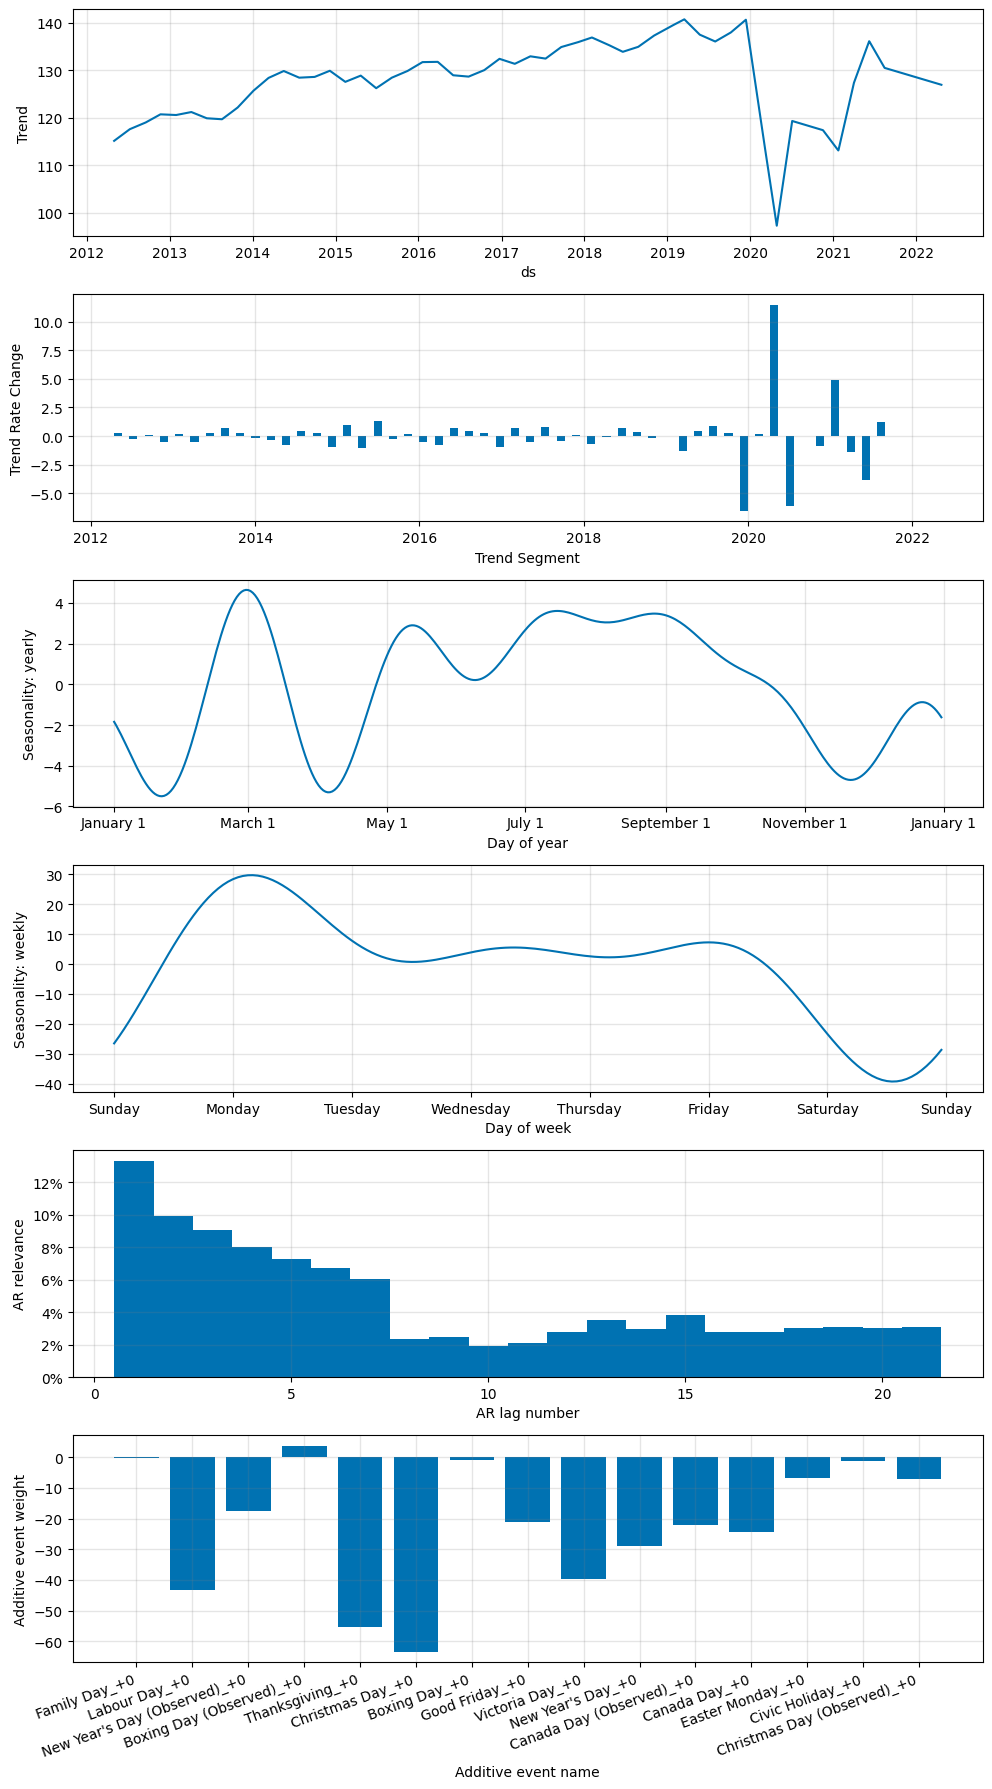

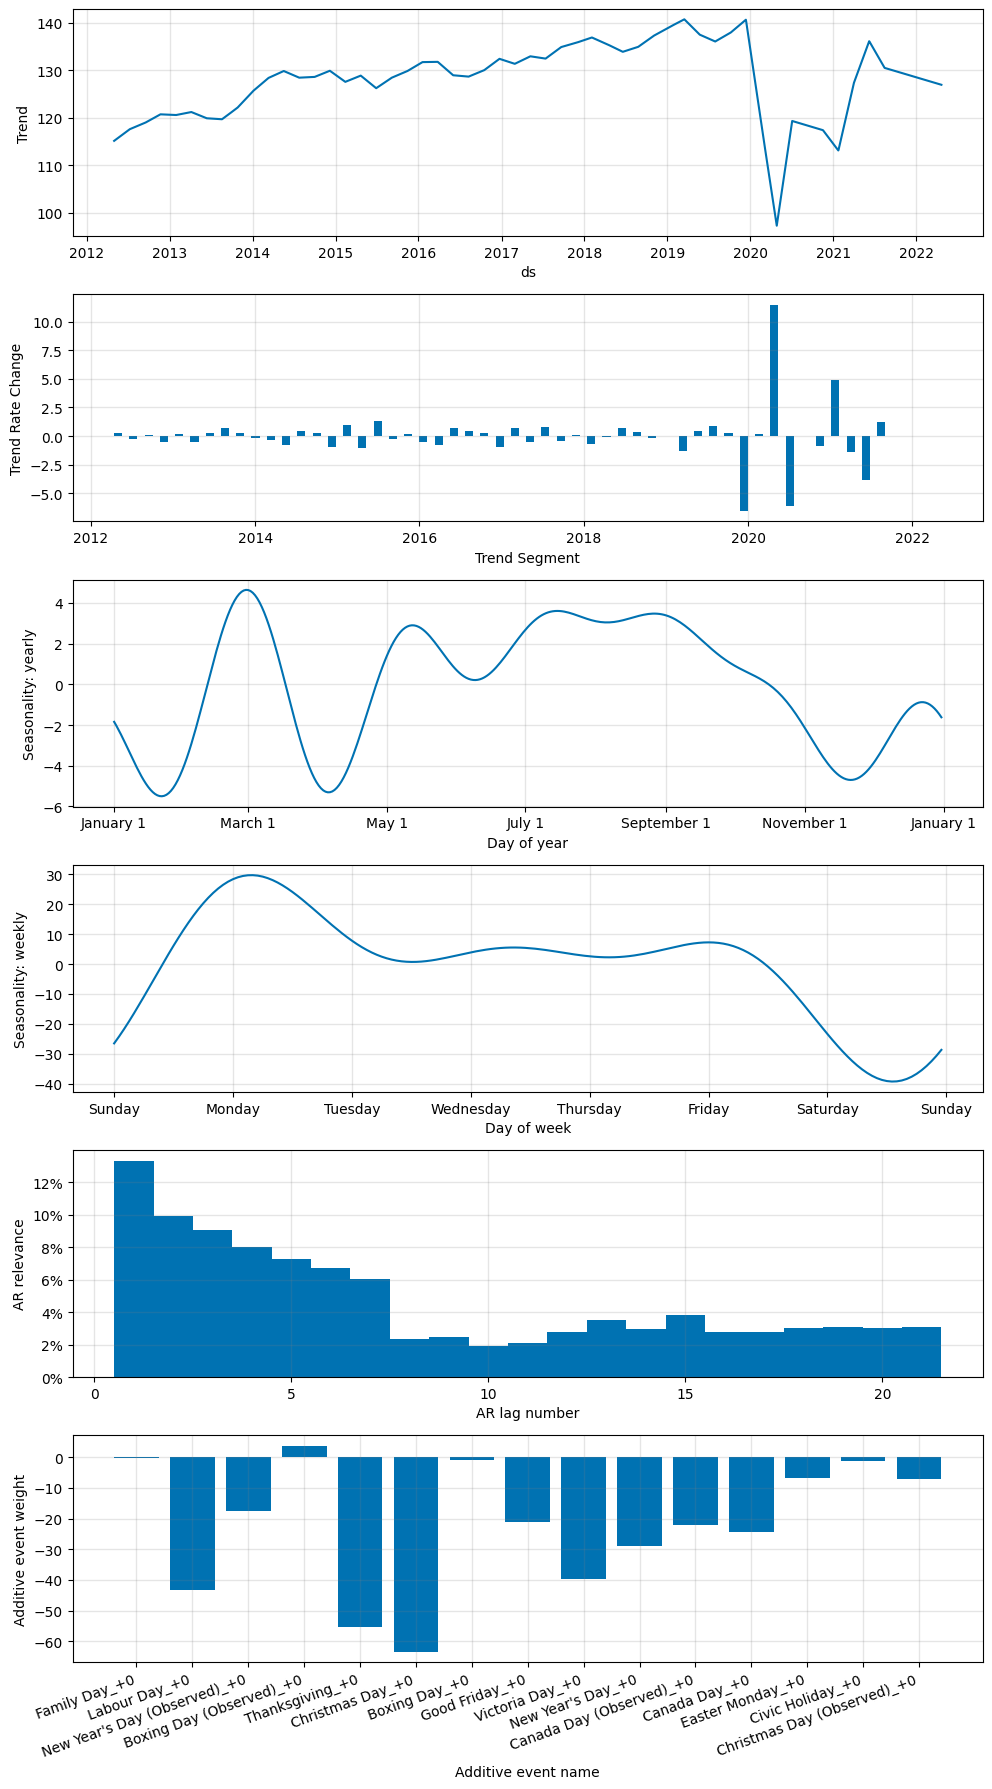

In [10]:
# m.plot(forecast)
# m.plot_components(forecast)
m.plot_parameters()
	

In [56]:
import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS
from statsforecast.utils import AirPassengersDF
import numpy as np

In [61]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/drdevinhopkins/hourly-report/main/data/daily-visits.csv')
df.ds = pd.to_datetime(df.ds)
df = df.sort_values(by='ds')
df['unique_id'] = 1
Y_train_df, Y_test_df = m.split_df(df, valid_p=0.05)
print('len(Y_train_df)', len(Y_train_df))
print('len(Y_test_df)', len(Y_test_df))
# df_train

WARNING - (py.warnings._showwarnmsg) - /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1036: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])

2022-11-05 02:24:01 py.warnings WARNING: /home/codespace/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1036: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])



len(Y_train_df) 3643
len(Y_test_df) 217


In [62]:
# Define the parameters that you want to use in your models. 
# Note: For all models the following parameters are passed automaticly and 
# don't need to be declared: (X, h, future_xreg).
# for ets we pass a ZMZ, model, which stands for error selected optimally,
season_length = 7
horizon = 7

# Select SARIMA with seasonality 12
autoARIMA = AutoARIMA(season_length=7)

# Select ETS with seasonality 12 and multiplicative trend
autoETS = ETS(season_length=7, model='ZMZ')
model = StatsForecast(df=Y_train_df.set_index('unique_id'), 
                      models=[autoARIMA, autoETS],
                      freq='D', n_jobs=-1)

# In this step, you could include further models like: 
# SimpleExponentialSmoothing, SeasonalExponentialSmoothing,
# HistoricAverage, SeasonalWindowAverage, 
# ADIDA, IMAPA, CrostonClassic, CrostonSBA, CrostonOptimized, TSB
# SeasonalNaive, Naive, RandomWalkWithDrift, WindowAverage
# See: https://nixtla.github.io/statsforecast/models.html

# For some models like ARIMA, include confidence intervals
# For the moment confidence intervals for ETS are unavailable
Y_hat_df = model.forecast(horizon).reset_index()
Y_hat_df.head()

,unique_id,ds,AutoARIMA,ETS
0,1.0,2022-04-22,228.571381,229.940414
1,1.0,2022-04-23,190.663696,195.991470
2,1.0,2022-04-24,189.046616,191.764542
3,1.0,2022-04-25,244.181625,252.463440
4,1.0,2022-04-26,235.029892,235.679535


In [63]:
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat-y_true))

y_true = Y_test_df['y'].values
ets_preds = Y_hat_df['ETS'].values
arima_preds = Y_hat_df['AutoARIMA'].values

print('ETS   MAE: %0.3f' % mae(ets_preds, y_true))
print('ARIMA MAE: %0.3f' % mae(arima_preds, y_true))

ValueError: operands could not be broadcast together with shapes (7,) (217,) 

In [68]:
ets_preds

array([229.94041, 195.99147, 191.76454, 252.46344, 235.67953, 230.71542,
       228.8478 ], dtype=float32)